# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df.drop('No', axis=1, inplace=True)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df["Date_time"] = pd.to_datetime(df[['day', 'month', 'year', 'hour']], format='%d.%m.%Y %H:%M:%S')
df = df.drop(['year', 'month', 'day', 'hour'], axis=1)
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date_time
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [ ]:
# đổi tên dataset
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain', 'date_time']
df.head(25)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,date_time
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
5,NaN,-19,-10.0,1017.0,NW,16.10,0,0,2010-01-01 05:00:00
6,NaN,-19,-9.0,1017.0,NW,19.23,0,0,2010-01-01 06:00:00
7,NaN,-19,-9.0,1017.0,NW,21.02,0,0,2010-01-01 07:00:00
8,NaN,-19,-9.0,1017.0,NW,24.15,0,0,2010-01-01 08:00:00
9,NaN,-20,-8.0,1017.0,NW,27.28,0,0,2010-01-01 09:00:00


# Check out the missing values

In [ ]:
df.isna().sum()

pollution    2067
dew             0
temp            0
press           0
wnd_dir         0
wnd_spd         0
snow            0
rain            0
date_time       0
dtype: int64

In [ ]:
df['pollution'].interpolate(method='pad', inplace=True)
# df['pollution'].fillna(0, inplace=True)
df = df.iloc[25:]
print(df.shape)
df.head(5)


(43799, 9)


,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,date_time
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
29,109.0,-7,-6.0,1022.0,SE,7.14,3,0,2010-01-02 05:00:00


In [ ]:
df.isna().sum()

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
date_time    0
dtype: int64

In [ ]:
# df.drop_duplicates(keep='first',inplace = True)
# df.head()
# df.shape

# Encode the Categorical data

In [ ]:
date_time = df['date_time']

In [ ]:
df['wnd_dir'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#import until

encoder =  LabelEncoder()
df['wnd_dir'] = encoder.fit_transform(df['wnd_dir'])
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,date_time
25,148.0,-15,-4.0,1020.0,2,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,2,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,2,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,2,6.25,2,0,2010-01-02 04:00:00
29,109.0,-7,-6.0,1022.0,2,7.14,3,0,2010-01-02 05:00:00


# Visualization

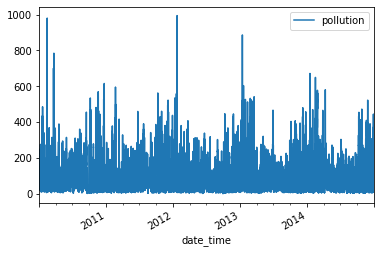

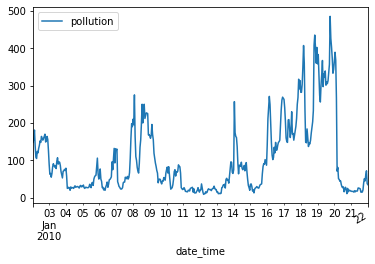

In [ ]:
plot_cols = ['pollution']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

Text(0.5, 1.0, 'wnd_dir')

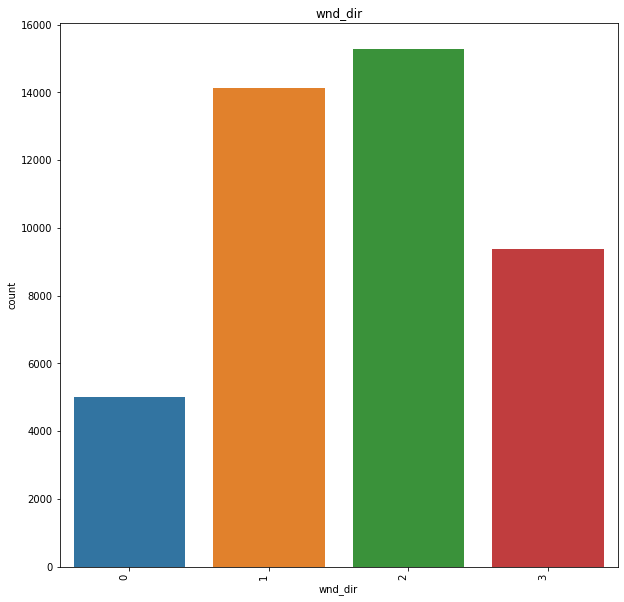

In [ ]:
sns.countplot(df['wnd_dir'])
sns.countplot(df['wnd_dir']).set_xticklabels(sns.countplot(df['wnd_dir']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('wnd_dir')

# Inspect and cleanup¶

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pollution,43799.0,97.783306,91.399463,0.00,29.00,72.00,136.00,994.0
dew,43799.0,1.828923,14.429240,-40.00,-10.00,2.00,15.00,28.0
temp,43799.0,12.459417,12.193270,-19.00,2.00,14.00,23.00,42.0
press,43799.0,1016.447225,10.271515,991.00,1008.00,1016.00,1025.00,1046.0
wnd_dir,43799.0,1.663508,0.938041,0.00,1.00,2.00,2.00,3.0
wnd_spd,43799.0,23.894812,50.023189,0.45,1.79,5.37,21.91,585.6
snow,43799.0,0.052764,0.760591,0.00,0.00,0.00,0.00,27.0
rain,43799.0,0.195027,1.416263,0.00,0.00,0.00,0.00,36.0


#### Time

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

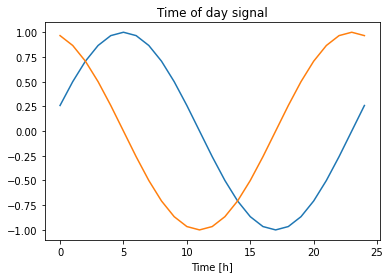

In [ ]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

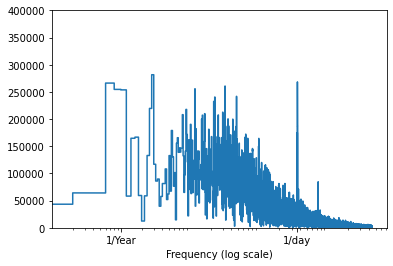

In [ ]:
fft = tf.signal.rfft(df['pollution'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['pollution'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [ ]:
import matplotlib.dates as mdates
df['date_time'] = mdates.date2num(df.date_time)
#df['date_time'] = df.date_time.to_pydatetime()
df.date_time

25       733774.041667
26       733774.083333
27       733774.125000
28       733774.166667
29       733774.208333
             ...      
43819    735598.791667
43820    735598.833333
43821    735598.875000
43822    735598.916667
43823    735598.958333
Name: date_time, Length: 43799, dtype: float64

# Split the data
`(70%, 20%, 10%)`

In [ ]:
from sklearn.model_selection import train_test_split

column_indices = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]
n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

In [ ]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,date_time,Day sin,Day cos,Year sin,Year cos
25,148.0,-15,-4.0,1020.0,2,2.68,0,0,733774.041667,0.258819,0.965926,0.023078,0.999734
26,159.0,-11,-5.0,1021.0,2,3.57,0,0,733774.083333,0.500000,0.866025,0.023795,0.999717
27,181.0,-7,-5.0,1022.0,2,5.36,1,0,733774.125000,0.707107,0.707107,0.024512,0.999700
28,138.0,-7,-5.0,1022.0,2,6.25,2,0,733774.166667,0.866025,0.500000,0.025228,0.999682
29,109.0,-7,-6.0,1022.0,2,7.14,3,0,733774.208333,0.965926,0.258819,0.025945,0.999663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,1,231.97,0,0,735598.791667,-0.965926,0.258819,-0.002079,0.999998
43820,10.0,-22,-3.0,1034.0,1,237.78,0,0,735598.833333,-0.866025,0.500000,-0.001362,0.999999
43821,10.0,-22,-3.0,1034.0,1,242.70,0,0,735598.875000,-0.707107,0.707107,-0.000645,1.000000
43822,8.0,-22,-4.0,1034.0,1,246.72,0,0,735598.916667,-0.500000,0.866025,0.000072,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43799 entries, 25 to 43823
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43799 non-null  float64
 1   dew        43799 non-null  int64  
 2   temp       43799 non-null  float64
 3   press      43799 non-null  float64
 4   wnd_dir    43799 non-null  int64  
 5   wnd_spd    43799 non-null  float64
 6   snow       43799 non-null  int64  
 7   rain       43799 non-null  int64  
 8   date_time  43799 non-null  float64
 9   Day sin    43799 non-null  float64
 10  Day cos    43799 non-null  float64
 11  Year sin   43799 non-null  float64
 12  Year cos   43799 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 4.3 MB


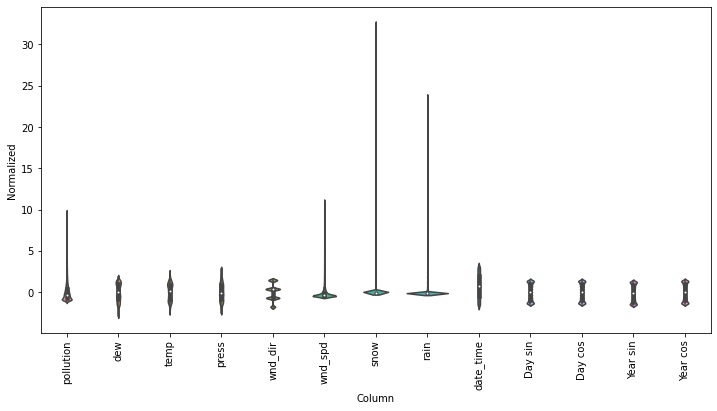

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
df_std

,Column,Normalized
0,pollution,0.526856
1,pollution,0.646264
2,pollution,0.885081
3,pollution,0.418303
4,pollution,0.103499
...,...,...
569382,Year cos,1.416622
569383,Year cos,1.416624
569384,Year cos,1.416625
569385,Year cos,1.416625


# Correlation between different variables

Index(['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain', 'date_time', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

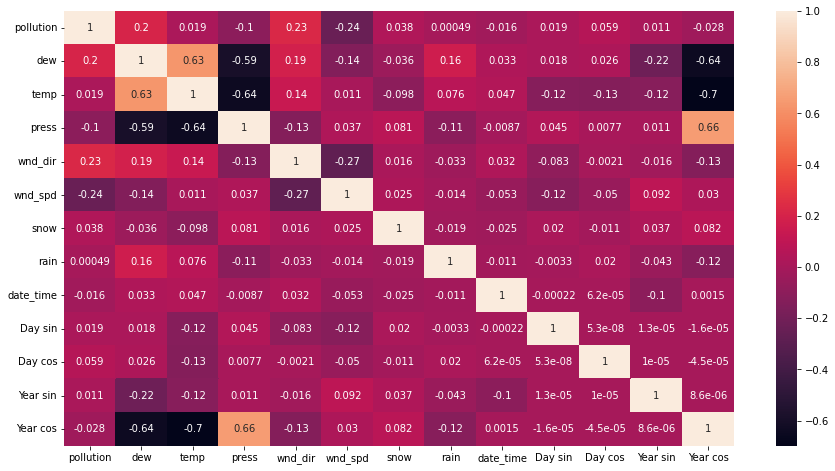

In [ ]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
x = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
y = df.pollution
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

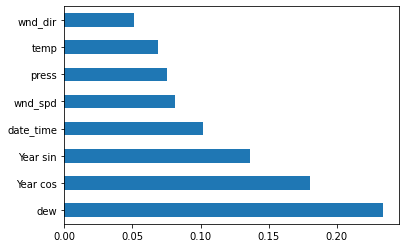

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

- *Single-output*, and *multi-output* predictions.
- *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.


The rest of this section defines a `WindowGenerator` class. This class can:

1. Handle the indexes and offsets as shown in the diagrams above.
1. Split windows of features into `(features, labels)` pairs.
2. Plot the content of the resulting windows.
3. Efficiently generate batches of these windows from the training, evaluation, and test data, using `tf.data.Dataset`s.

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['pollution'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['pollution']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['pollution'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['pollution']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 13)
Inputs shape: (3, 6, 13)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='pollution', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

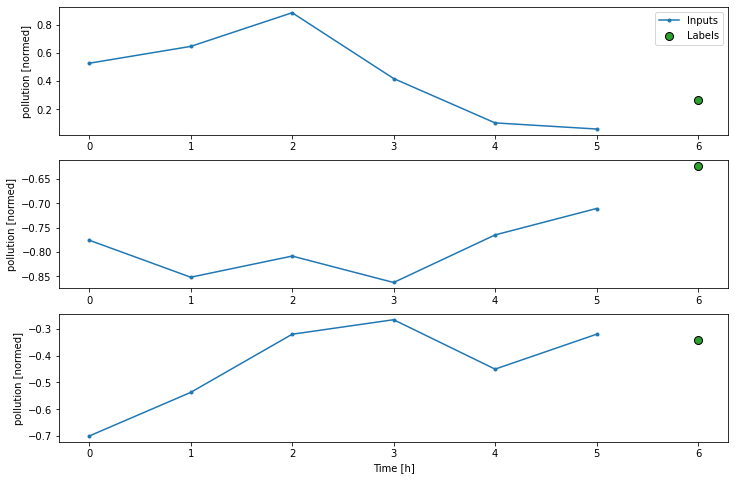

In [ ]:
w2.plot()

## Create `tf.data.Dataset`s




In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=64,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 13), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (64, 6, 13)
Labels shape (batch, time, features): (64, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['pollution'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['pollution']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (64, 1, 13)
Labels shape (batch, time, features): (64, 1, 1)


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['pollution'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['pollution']

# Single Step Model

In [ ]:
val_performance = {}
performance = {}

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=3):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

## LSTM

### Create model

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 1)


### Training and Evaluate

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 2s 13ms/step - loss: 0.0533 - mean_absolute_error: 0.1352


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


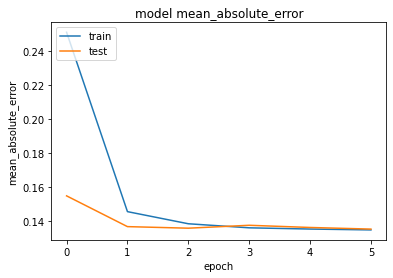

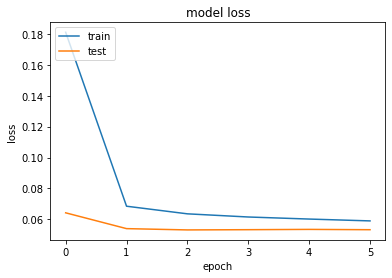

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot prediction


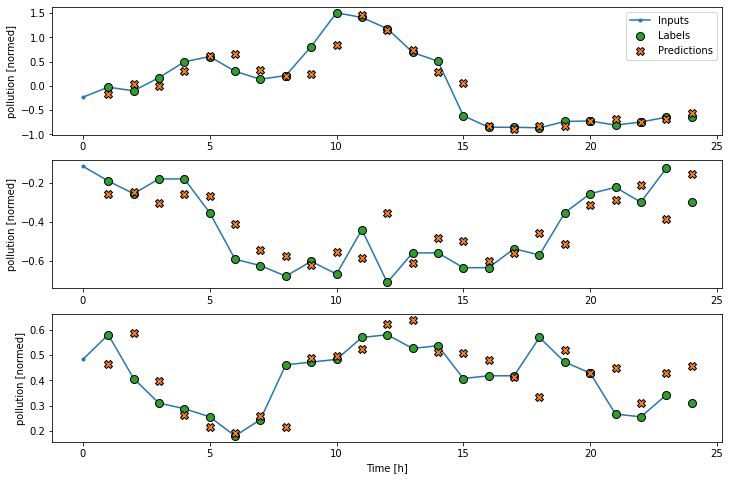

In [ ]:
wide_window.plot(lstm_model)

## Stacked LSTM

### Create model

In [ ]:
stacked_lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256,return_sequences=True),
    tf.keras.layers.LSTM(units=256,return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', stacked_lstm_model(wide_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 1)


### Training and Evaluate

In [ ]:
history = compile_and_fit(stacked_lstm_model, wide_window)

IPython.display.clear_output()
val_performance['Stack_LSTM'] = stacked_lstm_model.evaluate(wide_window.val)
performance['Stacked_LSTM'] = stacked_lstm_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 2s 17ms/step - loss: 0.0655 - mean_absolute_error: 0.1516


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


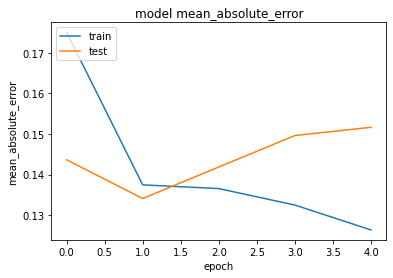

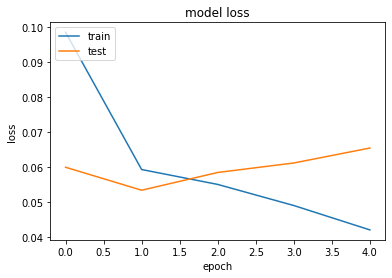

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting prediction

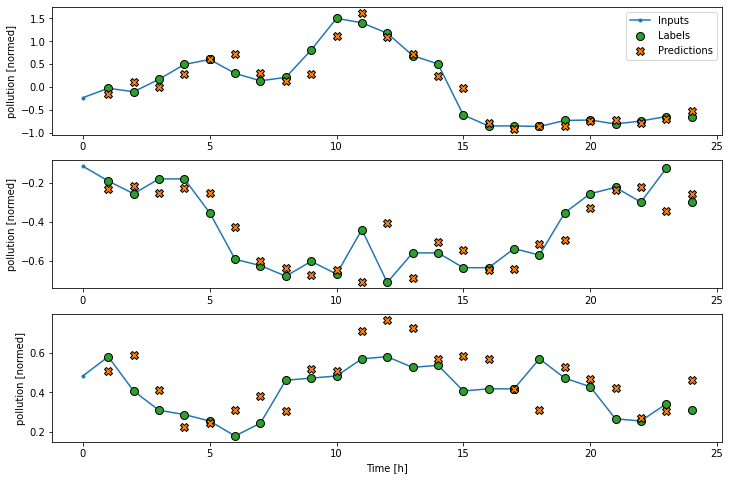

In [ ]:
wide_window.plot(stacked_lstm_model)

### Performance

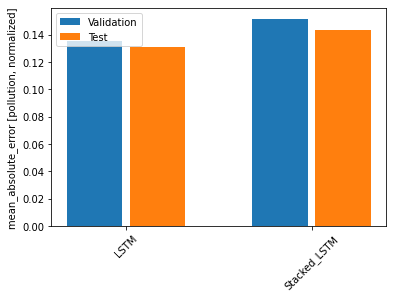

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = stacked_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.1309
Stacked_LSTM: 0.1437


## Bidirectional LSTM

### Create model

In [ ]:
# Building the model
bidirectional_lstm_model = tf.keras.models.Sequential([
    # Adding a Bidirectional LSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', bidirectional_lstm_model(wide_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 1)


### Training and Evaluate

In [ ]:
history = compile_and_fit(bidirectional_lstm_model, wide_window)

IPython.display.clear_output()
val_performance['Bidirectional_LSTM'] = bidirectional_lstm_model.evaluate(wide_window.val)
performance['Bidirectional_LSTM'] = bidirectional_lstm_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0160


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


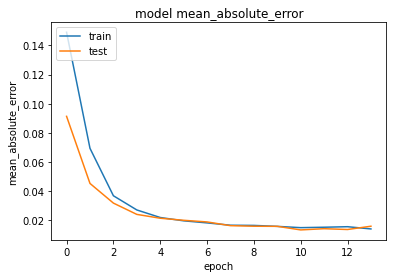

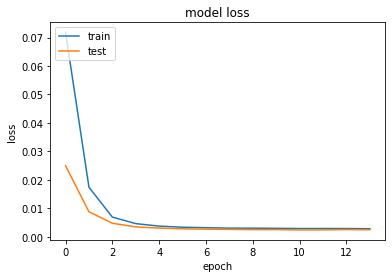

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot prediction

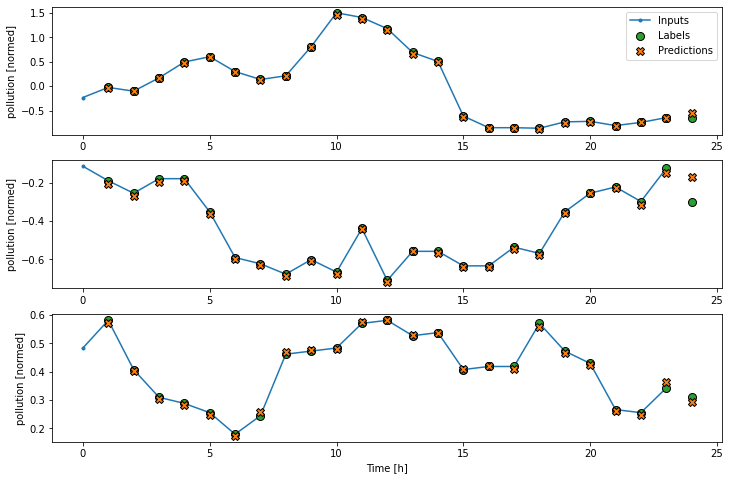

In [ ]:
wide_window.plot(bidirectional_lstm_model)

### Performance

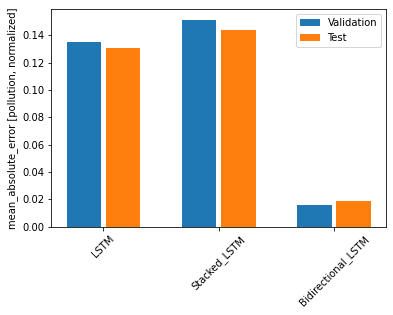

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = bidirectional_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.1309
Stacked_LSTM: 0.1437
Bidirectional_LSTM: 0.0188


## GRU

#### Create model

In [ ]:
gru_lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(256,return_sequences=True),
    tf.keras.layers.GRU(256,return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', gru_lstm_model(wide_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 1)


#### Training and Evaluate

In [ ]:
history = compile_and_fit(gru_lstm_model, wide_window)

IPython.display.clear_output()
val_performance['GRU'] = gru_lstm_model.evaluate(wide_window.val)
performance['GRU'] = gru_lstm_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 2s 14ms/step - loss: 0.0642 - mean_absolute_error: 0.1509


#### Performance

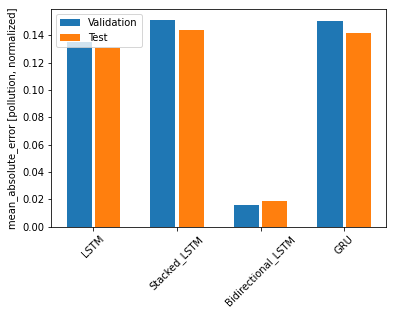

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = gru_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.1309
Stacked_LSTM: 0.1437
Bidirectional_LSTM: 0.0188
GRU         : 0.1421


## Encoder-Decoder Model

#### Create model

In [ ]:
enc_dec_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(256, activation='relu'),
  tf.keras.layers.RepeatVector(24),
  tf.keras.layers.LSTM(256, activation='relu', return_sequences=True),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', enc_dec_model(wide_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 1)


#### Training and Evaluate

In [ ]:
history = compile_and_fit(enc_dec_model, wide_window)

IPython.display.clear_output()
val_performance['enc_dec_model'] = enc_dec_model.evaluate(wide_window.val)
performance['enc_dec_model'] = enc_dec_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0914


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


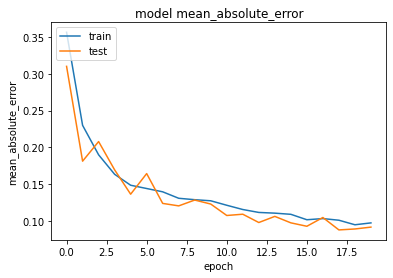

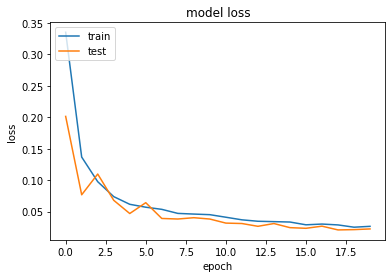

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Performance

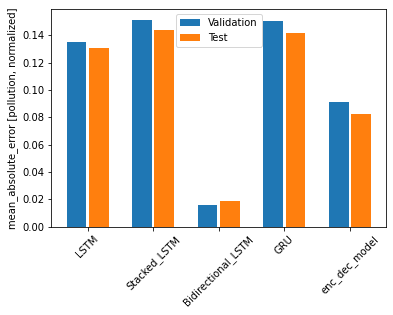

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = enc_dec_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.1309
Stacked_LSTM: 0.1437
Bidirectional_LSTM: 0.0188
GRU         : 0.1421
enc_dec_model: 0.0826


# Multi-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

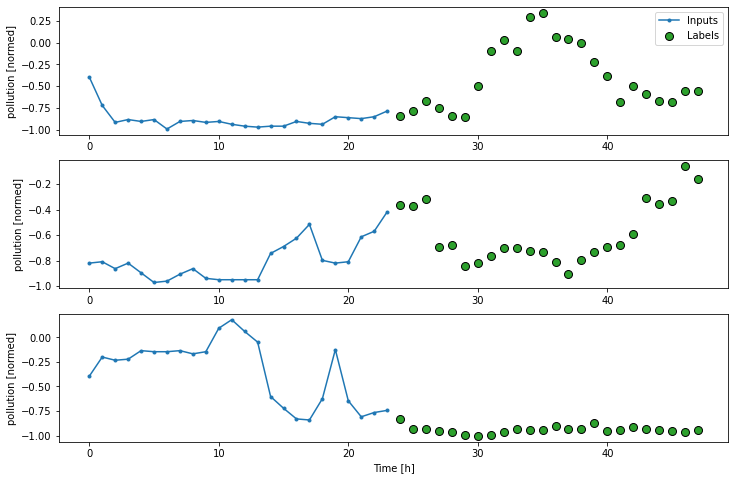

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_val_performance = {}
multi_performance = {}
multi_window.plot()
multi_window

## Multi LSTM

### Create Model

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(256, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [ ]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_lstm_model(multi_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 13)


### Training and Evaluate

In [ ]:
history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

137/137 [==============================] - 2s 13ms/step - loss: 0.3153 - mean_absolute_error: 0.2690


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


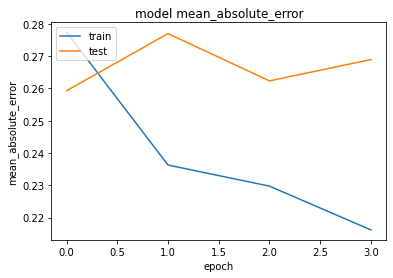

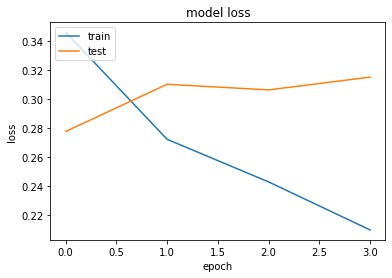

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Print prediction

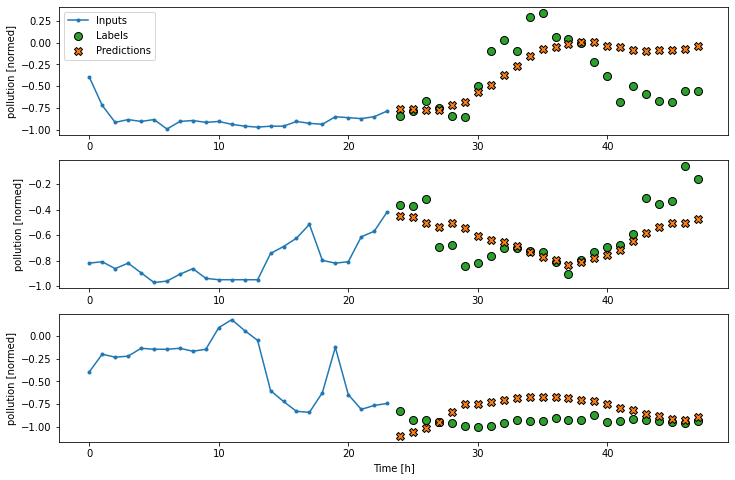

In [ ]:
multi_window.plot(multi_lstm_model)

## Multi Stack LSTM

### Create Model

In [ ]:
multi_stack_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [ ]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_lstm_model(multi_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 13)


### Training and Evaluate

In [ ]:
history = compile_and_fit(multi_stack_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Stack_LSTM'] = multi_stack_lstm_model.evaluate(multi_window.val)
multi_performance['Stack_LSTM'] = multi_stack_lstm_model.evaluate(multi_window.test, verbose=0)

137/137 [==============================] - 2s 15ms/step - loss: 0.3480 - mean_absolute_error: 0.3165


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


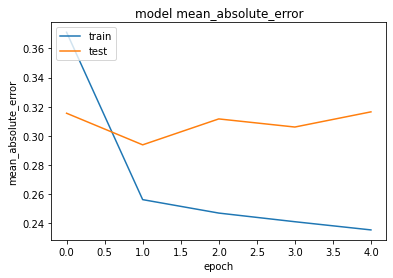

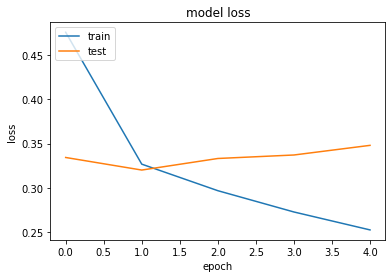

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot prediction

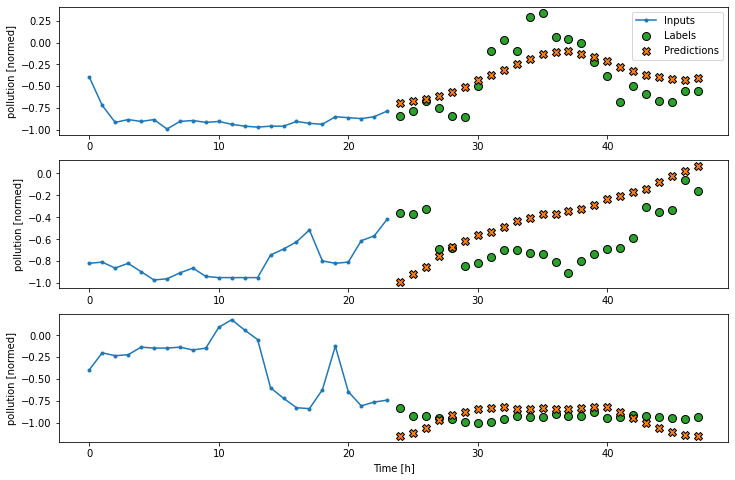

In [ ]:
multi_window.plot(multi_stack_lstm_model)

### Perfomance

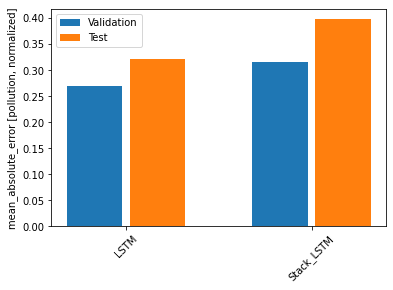

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = multi_stack_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.3215
Stack_LSTM  : 0.3978


## Multi Bidirectional LSTM

### Create Model

In [ ]:
multi_bidirectional_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=False)),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [ ]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_bidirectional_lstm_model(multi_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 13)


In [ ]:
multi_bidirectional_lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (64, 24, 512)            552960    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (64, 512)                1574912   
 nal)                                                            
                                                                 
 dense_7 (Dense)             (64, 312)                 160056    
                                                                 
 reshape_2 (Reshape)         (64, 24, 13)              0         
                                                                 
Total params: 2,287,928
Trainable params: 2,287,928
Non-trainable params: 0
_________________________________________________________________


### Training and Evaluate

In [ ]:
history = compile_and_fit(multi_bidirectional_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Bidirectional LSTM'] = multi_bidirectional_lstm_model.evaluate(multi_window.val)
multi_performance['Bidirectional LSTM'] = multi_bidirectional_lstm_model.evaluate(multi_window.test, verbose=0)


137/137 [==============================] - 3s 18ms/step - loss: 0.3466 - mean_absolute_error: 0.3038


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


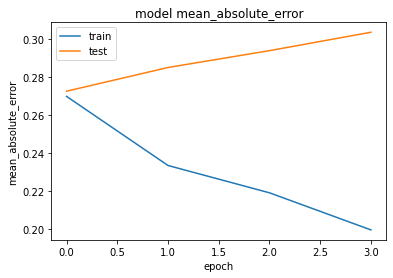

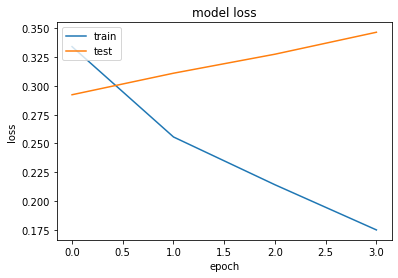

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot prediction

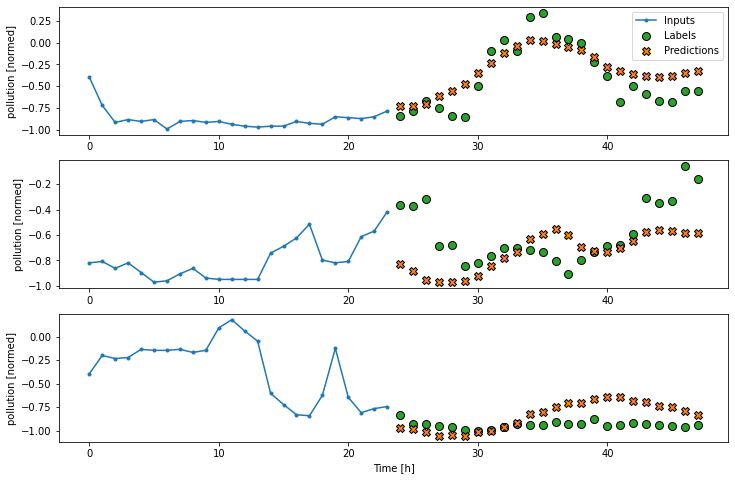

In [ ]:
multi_window.plot(multi_bidirectional_lstm_model)

### Performance

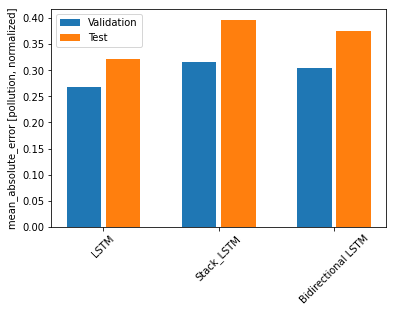

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = multi_bidirectional_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.3215
Stack_LSTM  : 0.3978
Bidirectional LSTM: 0.3757


## Multi GRU

### Create model

In [ ]:
multi_gru_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(64, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [ ]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_gru_model(multi_window.example[0]).shape)

Input shape: (64, 24, 13)
Output shape: (64, 24, 13)


### Training and Evaluate

In [ ]:
history = compile_and_fit(multi_gru_model, multi_window)

IPython.display.clear_output()
multi_val_performance['GRU'] = multi_gru_model.evaluate(multi_window.val)
multi_performance['GRU'] = multi_gru_model.evaluate(multi_window.test, verbose=0)

137/137 [==============================] - 2s 15ms/step - loss: 0.2992 - mean_absolute_error: 0.2751


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


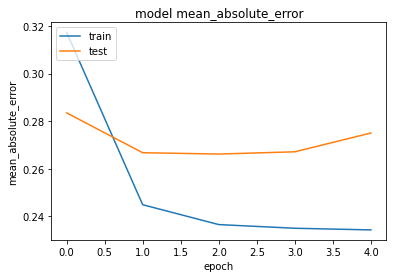

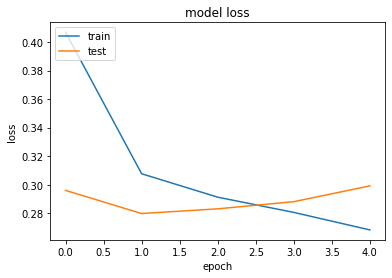

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot prediction

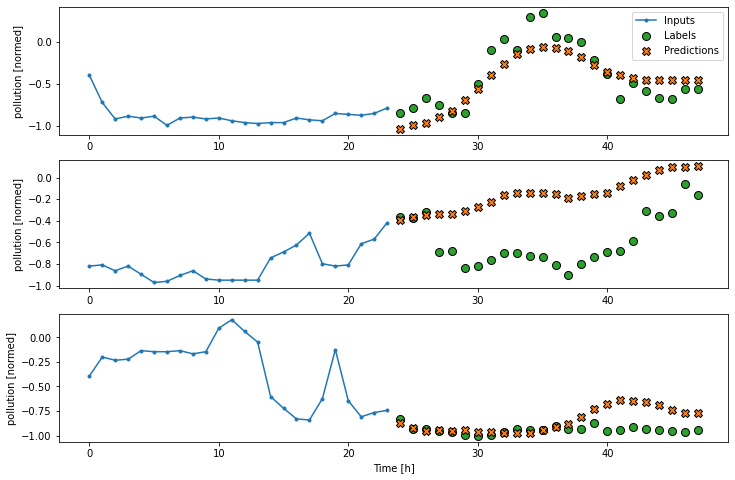

In [ ]:
multi_window.plot(multi_gru_model)

### Performance

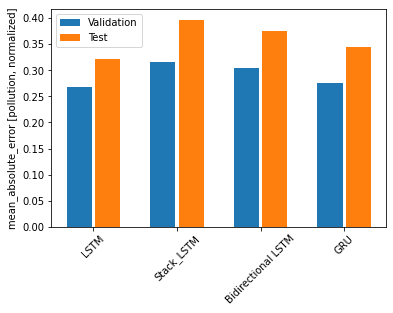

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = multi_gru_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('mean_absolute_error [pollution, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.3215
Stack_LSTM  : 0.3978
Bidirectional LSTM: 0.3757
GRU         : 0.3453


In [ ]:
train_df.